<a href="https://colab.research.google.com/github/matsu2254/study/blob/main/material/20240112_pandas_nyumon/notebook/zissen2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 実践応用（２）

習うより慣れろ！

ということで、公開されているFXチャートデータをデータフレームとして読み込み、前処理や描写をやってみる。

- mplfinane
  - mplfinaceはmatplotlib風の金融向けグラフ描写ライブラリ
  - キャンドルチャートなどがかける
- pandas_ta
  - pandas_ta（テクニカルアナライズ）は、pandasの時系列データから、金融向けのインジケータやチャートパターンを検出できる！！（なんかすごそう（小並感
  - 類似としてtalib


https://github.com/twopirllc/pandas-ta/pull/693

https://github.com/matplotlib/mplfinance/blob/master/examples/external_axes.ipynb


In [2]:
! pip install pandas_ta mplfinance

import pandas as pd
import mplfinance as mpf
import pandas_ta as ta
import numpy as np

import shutil
import requests


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 549.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 6.9 MB/s eta 0:00:00
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=791b959b45768f8b71179af9e433e223872c8c0a414f8357f4c5ee504d2129a5
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [3]:
# データの取得
# 時間がかかる
r = requests.get('https://forextester.com/templates/data/files/GBPJPY.zip')
with open('GBPJPY.zip', 'wb') as f:
  f.write(r.content)

# データの解凍
shutil.unpack_archive('GBPJPY.zip')

In [4]:
# 解凍したデータの読み込み
odf  = pd.read_csv(
      'GBPJPY.txt',
       parse_dates=[['<DTYYYYMMDD>','<TIME>']]
    ).set_index('<DTYYYYMMDD>_<TIME>')

# 適当に用意しておいた予測データのインポート
predict_df = pd.read_pickle('https://raw.githubusercontent.com/matsu2254/study/main/material/20240112_pandas_nyumon/notebook/greykite_predict_GBPJPY.pickle').set_index('<DTYYYYMMDD>_<TIME>')

odf

,<TICKER>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
<DTYYYYMMDD>_<TIME>,,,,,,
2001-01-02 23:01:00,GBPJPY,171.88,171.88,171.86,171.86,4
2001-01-02 23:02:00,GBPJPY,171.86,171.87,171.86,171.87,4
2001-01-02 23:03:00,GBPJPY,171.87,171.87,171.87,171.87,4
2001-01-02 23:04:00,GBPJPY,171.87,171.88,171.87,171.88,4
2001-01-02 23:05:00,GBPJPY,171.88,171.88,171.88,171.88,4
...,...,...,...,...,...,...
2023-11-30 23:55:00,GBPJPY,186.81,186.81,186.81,186.81,4
2023-11-30 23:56:00,GBPJPY,186.79,186.79,186.79,186.79,4
2023-11-30 23:57:00,GBPJPY,186.80,186.80,186.80,186.80,4


~~~python
odf  = pd.read_csv(
      'GBPJPY.txt',
       parse_dates=[['<DTYYYYMMDD>','<TIME>']]
    ).set_index('<DTYYYYMMDD>_<TIME>')
~~~

- pd.read_csv('GBPJPY.txt', ...
  -  pd.read_csv関数を使って、'GBPJPY.txt' ファイルからデータを読み込んでいます。CSVファイルからデータをDataFrameに取り込むためのメソッドです。

- parse_dates=[['<DTYYYYMMDD>', '<TIME>']]
  - 読み込んだデータの中で、'<DTYYYYMMDD>'と'<TIME>'の列を組み合わせて日時データとして解釈するようにしています。これにより、日付と時刻の情報が正しく解釈されます。

- .set_index('<DTYYYYMMDD>_<TIME>')
  -  読み込んだデータのインデックスを、'<DTYYYYMMDD>_<TIME>'列に設定します。これにより、時系列データとして扱いやすくなります。

- 最終的に、odfという変数に、CSVファイルから読み込んだデータがDataFrameとして格納されます。このデータを利用して、時系列データの分析や可視化などが可能です。

In [5]:
# 列のリネーム
# 列の名前から<>がなくなっている
# [ <TICKER> 	<OPEN> 	<HIGH> 	<LOW> 	<CLOSE> 	<VOL> ] --> [ Ticker 	Open 	High 	Low 	Close 	Vol ]
odf.columns = ['Ticker','Open','High','Low','Close','Vol']
odf

,Ticker,Open,High,Low,Close,Vol
<DTYYYYMMDD>_<TIME>,,,,,,
2001-01-02 23:01:00,GBPJPY,171.88,171.88,171.86,171.86,4
2001-01-02 23:02:00,GBPJPY,171.86,171.87,171.86,171.87,4
2001-01-02 23:03:00,GBPJPY,171.87,171.87,171.87,171.87,4
2001-01-02 23:04:00,GBPJPY,171.87,171.88,171.87,171.88,4
2001-01-02 23:05:00,GBPJPY,171.88,171.88,171.88,171.88,4
...,...,...,...,...,...,...
2023-11-30 23:55:00,GBPJPY,186.81,186.81,186.81,186.81,4
2023-11-30 23:56:00,GBPJPY,186.79,186.79,186.79,186.79,4
2023-11-30 23:57:00,GBPJPY,186.80,186.80,186.80,186.80,4


In [6]:
# 4時間足にリサンプル、列ごとに区間のどこのデータを使うか定義

d_ohlc = {
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last'
        }

# locでデータをスライスする
# resample, aggでデータを４時間ごとに変換
# resampleでサンプルし直す時間を指定
# aggで各列を集約する関数を指定

df = odf.loc['2023-04-01':'2023-04-30'].resample('4H').agg(d_ohlc)

# 同じようにスライスする
p_df = predict_df.loc['2021-04-01':'2023-04-30']

# 予測データともとデータの結合
df  = pd.merge(df,p_df,on='<DTYYYYMMDD>_<TIME>',how='left')

# 空白をうめる
df[['forecast','forecast_upper','forecast_lower']] = df[['forecast','forecast_upper','forecast_lower']].fillna(method='ffill')

df

,Open,High,Low,Close,actual,forecast,forecast_lower,forecast_upper
<DTYYYYMMDD>_<TIME>,,,,,,,,
2023-04-02 20:00:00,164.29,164.29,163.40,163.56,NaN,NaN,NaN,NaN
2023-04-03 00:00:00,163.68,163.98,163.51,163.92,164.86,165.386078,164.305086,166.467071
2023-04-03 04:00:00,163.93,164.70,163.88,164.63,NaN,165.386078,164.305086,166.467071
2023-04-03 08:00:00,164.64,164.86,164.41,164.57,NaN,165.386078,164.305086,166.467071
2023-04-03 12:00:00,164.56,164.58,163.75,164.18,NaN,165.386078,164.305086,166.467071
...,...,...,...,...,...,...,...,...
2023-04-30 04:00:00,NaN,NaN,NaN,NaN,NaN,170.528743,168.920586,172.136901
2023-04-30 08:00:00,NaN,NaN,NaN,NaN,NaN,170.528743,168.920586,172.136901
2023-04-30 12:00:00,NaN,NaN,NaN,NaN,NaN,170.528743,168.920586,172.136901


```python
d_ohlc = {
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last'
}

df = odf.loc['2023-04-01':'2023-04-30'].resample('4H').agg(d_ohlc)
```

このコードは、時系列データを4時間ごとにサンプリングして、各サンプルにおいてOpen, High, Low, Closeの値を集約する操作を行います。以下にコードの詳細を説明します。

1. `d_ohlc`
  - 集約する際に使用する各列の集約関数を指定する辞書です。Openは最初の値、Highは最大値、Lowは最小値、Closeは最後の値として集約します。

2. `odf.loc['2023-04-01':'2023-04-30']`
  -  `odf` データフレームから、指定した期間のデータを抽出します。

3. `resample('4H')`
  -  4時間ごとのサンプリングを行います。時系列データを再サンプリングするためのメソッドです。

4. `agg(d_ohlc)`
  -  指定された集約関数でデータを集約します。ここでは `d_ohlc` で指定された関数に従って、各列（Open, High, Low, Close）を集約します。

これにより、指定した期間の4時間ごとのOpen, High, Low, CloseのOHLCデータが含まれる新しいデータフレーム `df` が生成されます。

---

```python
df = pd.merge(df, p_df, on='<DTYYYYMMDD>_<TIME>', how='left')
```

このコードは、`df` データフレームに新たなデータフレーム `p_df` を左結合（left join）し、その後、特定の列の欠損値を前方向に埋める操作を行っています。

---

- `pd.merge(df, p_df, on='<DTYYYYMMDD>_<TIME>', how='left')`
 - `df` と `p_df` を `<DTYYYYMMDD>_<TIME>` 列をキーにして左結合します。左結合は `df` を基準にして、一致するデータが `p_df` にあれば追加します。結合の方法は `how='left'` で指定されています。

---

```python
df[['forecast', 'forecast_upper', 'forecast_lower']] = df[['forecast', 'forecast_upper', 'forecast_lower']].fillna(method='ffill')
```

- `df[['forecast', 'forecast_upper', 'forecast_lower']]`
  - `df` データフレームから 'forecast', 'forecast_upper', 'forecast_lower' 列を選択します。
- `.fillna(method='ffill')`
  - 選択した列に対して、欠損値を前方向（forward fill）に埋める操作を行います。これにより、欠損値が前の値で埋められます。

このような結合と欠損値の補完は、複数のデータソースから取得したデータを一つのデータフレームにまとめ、欠損値を適切に処理する際によく使用されます。

In [7]:
# インジケータの用意
# 表題のセルに貼っているURLを参照

rsi = ta.momentum.rsi(df['Close'],length=3)
psar = ta.trend.psar(high=df['High'],low=df['Low'])

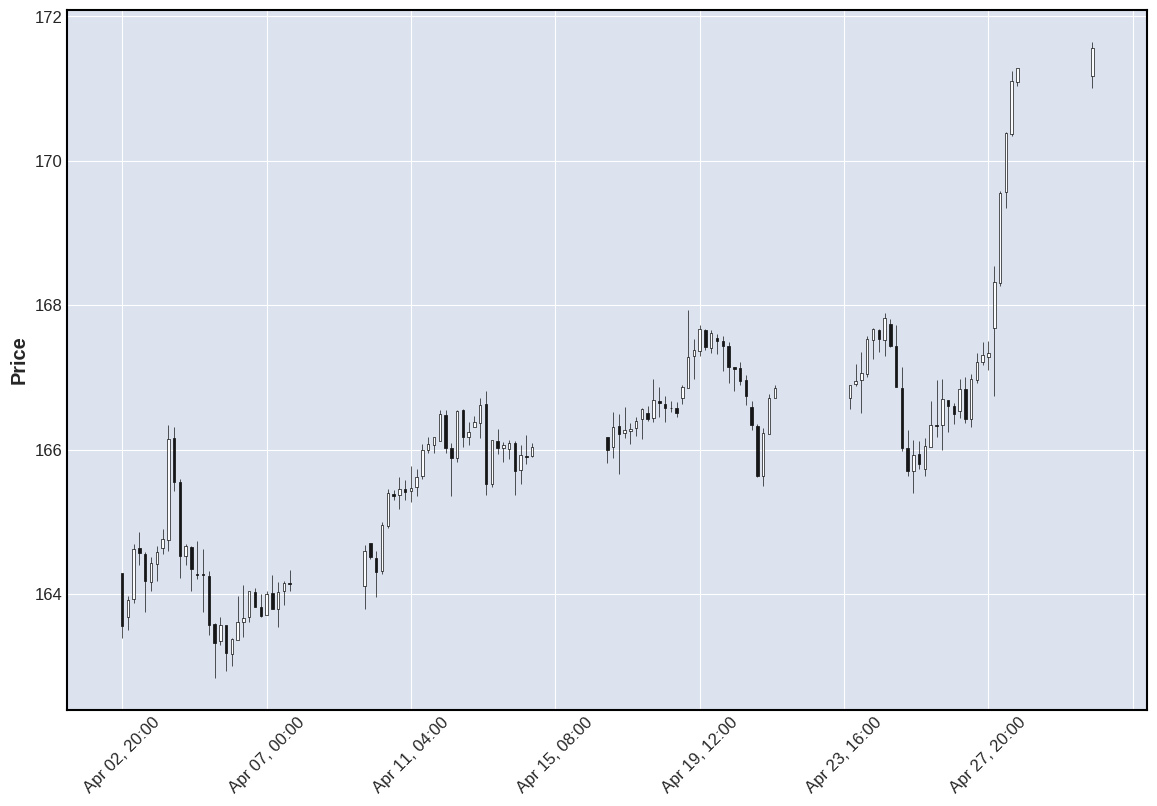

In [8]:
# 一番簡単な例
mpf.plot(df,type='candle',figsize=(15,10))

[171.65, 171.29, 167.93]


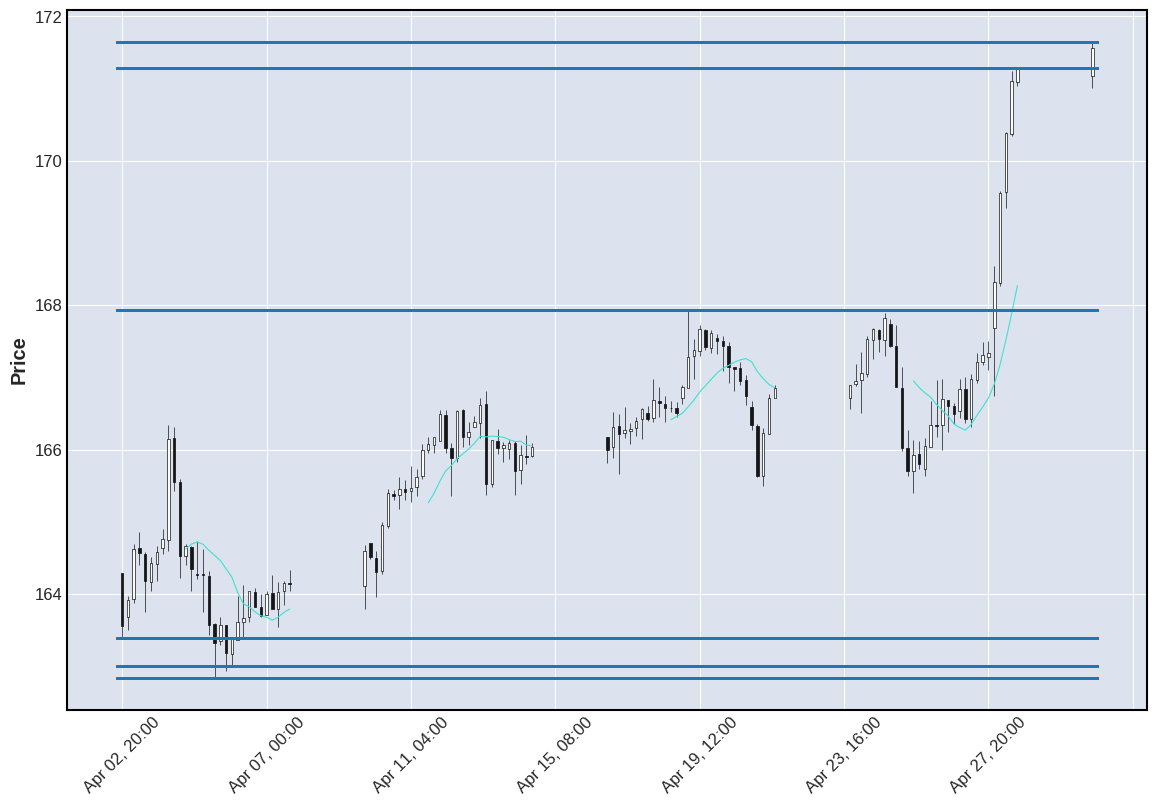

In [9]:
# 水平線を引く

# df['High'].resample('d').max().nlargest(n=3).values.tolist()
# 'High'列を抜き出し、最大値で集約、日次のデータにする。
# そのデータから大きい方から３つ取得し、リストにする。

print (df['High'].resample('d').max().nlargest(n=3).values.tolist())

mpf.plot(
        df,
        type='candle',
        figsize=(15,10),
        mav=12,
        hlines=df['High'].resample('d').max().nlargest(n=3).values.tolist()
                + df['Low'].resample('d').min().nsmallest(n=3).values.tolist()
        )


```python
df['High'].resample('d').max().nlargest(n=3).values.tolist()
```


このコードは、DataFrame（データフレーム）の `df` の 'High' 列を日次（'d'）でリサンプリングし、その後最大値を計算して、最大値の中で上位3つを取得しています。そして、それらの最大値をリストに変換しています。


- `df['High']`
  - DataFrameから 'High' 列を選択します。
- `.resample('d')`
  - 日次（日単位）でデータをリサンプリングします。ここでは 'd' が日次を意味します。
- `.max()`
  -  各日における 'High' 列の最大値を計算します。
- `.nlargest(n=3)`
  - 最大の3つの値を取得します。`n=3` は上位3つを意味します。
- `.values.tolist()`
  - 結果をリストに変換します。

このコードを実行することで、'High' 列を日次でリサンプリングして最大値を計算し、その中で最も大きい3つの値がリストとして得られます。

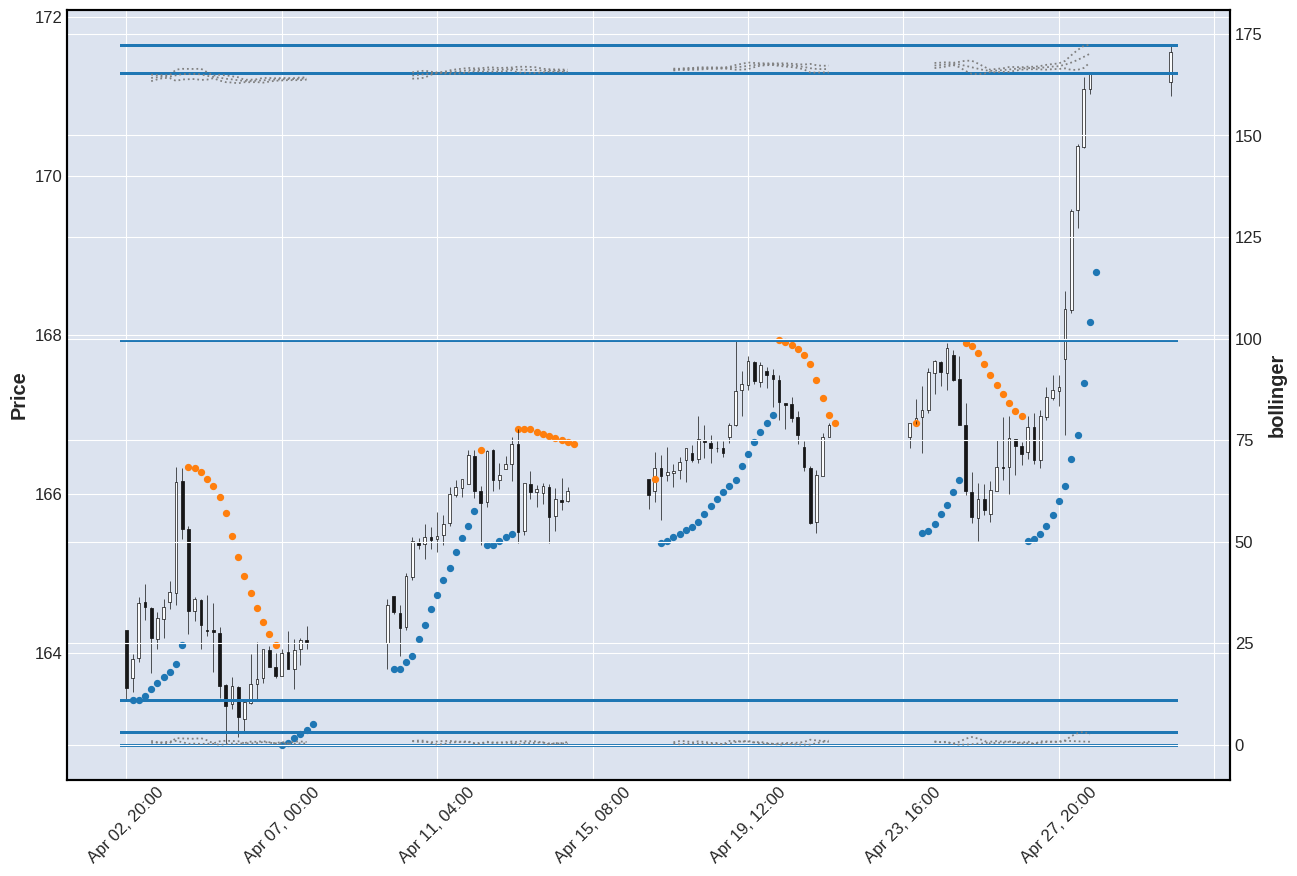

In [10]:
# matplotlib的な書き方で、PSARを描写する
fig = mpf.figure(figsize=(15,10))
ax1 = fig.add_subplot()
ax2 = ax1.twinx()
op = [
      mpf.make_addplot(psar['PSARl_0.02_0.2'],ax=ax1,type='scatter'),
      mpf.make_addplot(psar['PSARs_0.02_0.2'],ax=ax1,type='scatter'),
      mpf.make_addplot(df.ta.bbands(),ax=ax2,ylabel='bollinger',type='line',color='grey',linestyle='dotted'),
      ]

mpf.plot(
         df,
         type='candle',
         ax=ax1,
         addplot=op,
         hlines=df['High'].resample('d').max().nlargest(n=3).values.tolist()
                + df['Low'].resample('d').min().nsmallest(n=3).values.tolist()
        )

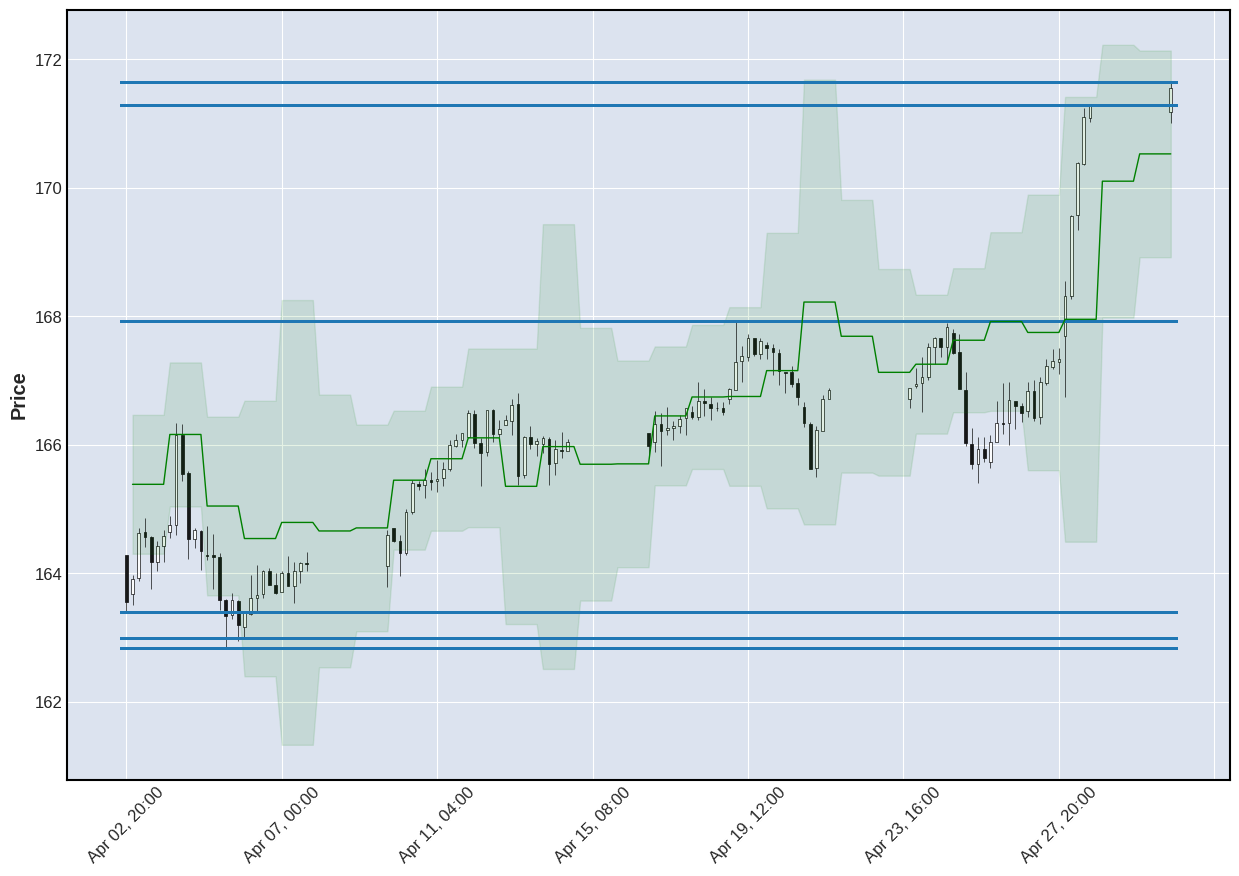

In [11]:
# greykiteで4h*4本分の予測をプロット、95％信頼区間を描写

fig2 = mpf.figure(figsize=(15,10))
ax21 = fig2.add_subplot()

op2 = [
    mpf.make_addplot(
                    df['forecast'],
                    ax=ax21,
                    type='line',
                    color='green',
                    width=1,
                    fill_between=dict(y1=df['forecast_upper'].values,y2=df['forecast_lower'].values,alpha=0.1,color='green')
                    )
]

mpf.plot(
    df,
    type='candle',
    ax=ax21,
    addplot=op2,
    hlines=df['High'].resample('d').max().nlargest(n=3).values.tolist()
                + df['Low'].resample('d').min().nsmallest(n=3).values.tolist()
    )


In [12]:
df.describe()

,Open,High,Low,Close,actual,forecast,forecast_lower,forecast_upper
count,121.000000,121.000000,121.000000,121.00000,24.000000,168.000000,168.000000,168.000000
mean,165.991488,166.281074,165.731983,166.05000,166.776667,166.595072,164.748250,168.441895
std,1.493197,1.535914,1.525014,1.57371,1.829059,1.507767,1.646090,1.740621
min,163.170000,163.400000,162.840000,163.19000,164.130000,164.542373,161.331785,166.315844
25%,164.710000,165.000000,164.490000,164.76000,166.040000,165.434182,163.637537,167.188495
50%,166.160000,166.390000,165.940000,166.17000,166.700000,166.306284,164.740375,168.004860
75%,166.720000,167.010000,166.520000,166.86000,167.525000,167.643988,165.577392,169.341159
max,171.180000,171.650000,171.030000,171.56000,171.650000,170.528743,168.920586,172.226170


In [13]:
# ライブラリの機能説明
# 対数リターンの取得
df.ta.log_return(cumulative=True,append=True)

<DTYYYYMMDD>_<TIME>
2023-04-02 20:00:00    0.000000
2023-04-03 00:00:00    0.002199
2023-04-03 04:00:00    0.006521
2023-04-03 08:00:00    0.006156
2023-04-03 12:00:00    0.003783
                         ...   
2023-04-30 04:00:00         NaN
2023-04-30 08:00:00         NaN
2023-04-30 12:00:00         NaN
2023-04-30 16:00:00         NaN
2023-04-30 20:00:00    0.047753
Name: CUMLOGRET_1, Length: 169, dtype: float64

In [14]:
# 機能説明２
df.ta.percent_return(cumulatative=True,append=True)

<DTYYYYMMDD>_<TIME>
2023-04-02 20:00:00         NaN
2023-04-03 00:00:00    0.002201
2023-04-03 04:00:00    0.004331
2023-04-03 08:00:00   -0.000364
2023-04-03 12:00:00   -0.002370
                         ...   
2023-04-30 04:00:00    0.000000
2023-04-30 08:00:00    0.000000
2023-04-30 12:00:00    0.000000
2023-04-30 16:00:00    0.000000
2023-04-30 20:00:00    0.001576
Name: PCTRET_1, Length: 169, dtype: float64

In [15]:
# 機能説明３
df.ta.bbands()

,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0
<DTYYYYMMDD>_<TIME>,,,,,
2023-04-02 20:00:00,NaN,NaN,NaN,NaN,NaN
2023-04-03 00:00:00,NaN,NaN,NaN,NaN,NaN
2023-04-03 04:00:00,NaN,NaN,NaN,NaN,NaN
2023-04-03 08:00:00,NaN,NaN,NaN,NaN,NaN
2023-04-03 12:00:00,163.368866,164.172,164.975134,0.978405,0.50498
...,...,...,...,...,...
2023-04-30 04:00:00,NaN,NaN,NaN,NaN,NaN
2023-04-30 08:00:00,NaN,NaN,NaN,NaN,NaN
2023-04-30 12:00:00,NaN,NaN,NaN,NaN,NaN


In [16]:
# 高値を上から３つ取り出し、リストにする
df['High'].nlargest(n=3).values.tolist()

[171.65, 171.29, 171.24]

In [17]:
# 愚直にトレンド転換点を記録する

# .iterrows()で添字と、行を取り出す

f=False
for index, row in psar.iterrows():
    if pd.notnull(row['PSARl_0.02_0.2']) and not f:
        f=True
        psar.at[index,'Trend']='Long'
        psar.at[index,'TPrice']=row['PSARl_0.02_0.2']
    elif pd.notnull(row['PSARs_0.02_0.2']) and f:
        f=False
        psar.at[index,'Trend']='Short'
        psar.at[index,'TPrice']=row['PSARs_0.02_0.2']
    else:
        psar.at[index,'Trend']='None'
        psar.at[index,'TPrice']=np.nan


~~~python
psar.iterrows()
~~~

`iterrows()` は、Pandas DataFrame の各行に対して行のインデックスと行のデータ（Series）のペアを反復処理するためのメソッドです。

このコードでは、DataFrame `psar` の各行に対して `iterrows()` を使用しています。`iterrows()` は各行に対して行のインデックス (`index`) と行のデータ (`row`) を返します。

ただし、`iterrows()` は行ごとに Series オブジェクトを返すため、大規模なデータセットに対して使用すると効率が低い場合があります。処理が遅い場合は、他の方法を検討することが推奨されます。

---

~~~python
f=False
for index, row in psar.iterrows():
...etc...
~~~

このコードは、`psar` というデータフレームに対して、PSAR（Parabolic SAR）を基にしたトレンドを判定し、その結果を 'Trend' 列に、トレンドが発生した際の価格を 'TPrice' 列に格納しています。

- `f`
  - トレンドの状態を示すフラグで、初期値は `False` です。

- `for index, row in psar.iterrows():`
  - `psar` データフレームの各行に対して、行のインデックスと行のデータを取得するためのループを行います。

- `if pd.notnull(row['PSARl_0.02_0.2']) and not f:` # trueの前提で話を進める
  - トレンドがまだ発生していない状態を確認します。
  - 'PSARl_0.02_0.2' 列の値が欠損値でないかを判定します。

- `f = True`
  - トレンドが発生したことを示すフラグを `True` に設定します。

- `psar.at[index, 'Trend'] = 'Long'`
  - 'Trend' 列に 'Long' を設定します。

- `psar.at[index, 'TPrice'] = row['PSARl_0.02_0.2']`
  - 'TPrice' 列にトレンド発生時の価格を設定します。

同様に、`elif pd.notnull(row['PSARs_0.02_0.2']) and f:` の部分では、トレンドが発生している状態で 'PSARs_0.02_0.2' 列の値が欠損値でないかを確認し、トレンドが終了したことを示す処理が行われます。

最後の `else` の部分では、トレンドが発生していない状態を示し、'Trend' 列に 'None' を、'TPrice' 列には欠損値を設定します。

このような処理を行うことで、各行に対してトレンドの状態やトレンド発生時の価格を 'Trend' 列と 'TPrice' 列に格納しています。

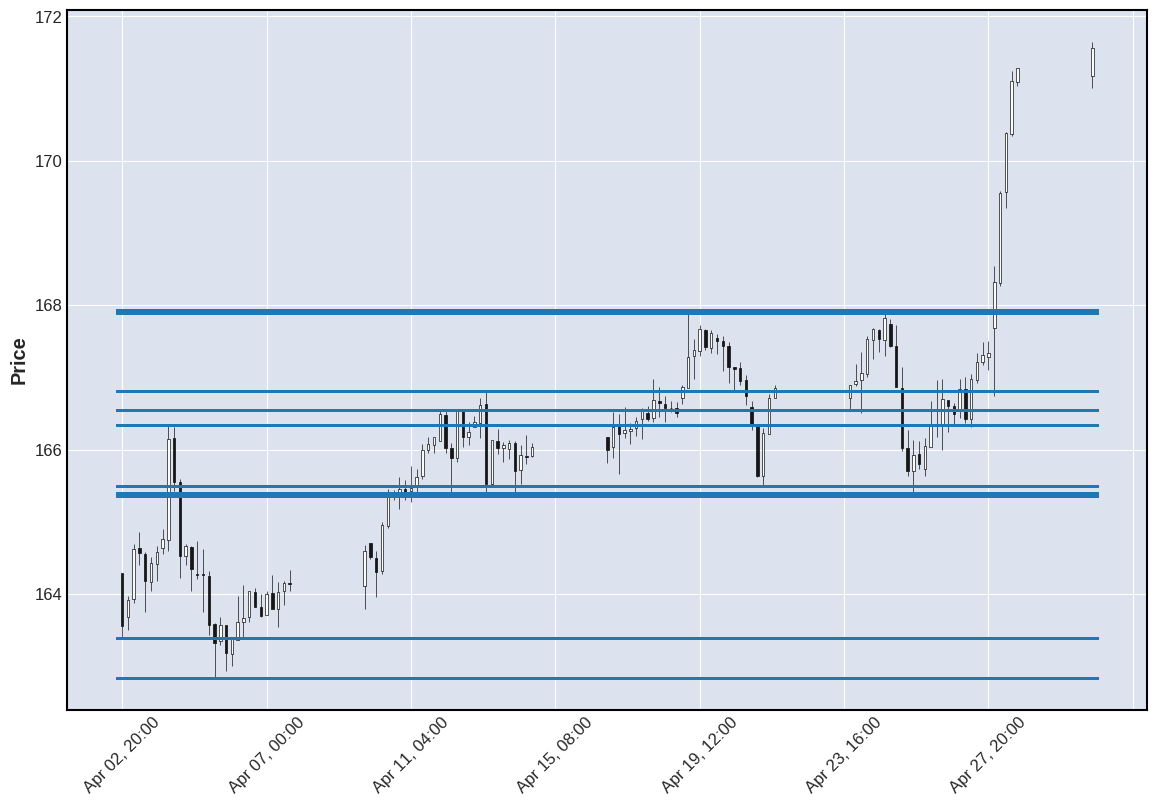

[163.4,
 166.34,
 162.84,
 166.55,
 165.36,
 166.81,
 165.38,
 167.93,
 165.5,
 167.9,
 165.4]

In [18]:
df_2 = odf.loc['2023-04-01':'2023-04-30'].resample('4H').agg(d_ohlc)

mpf.plot(
    df,
    figsize=(15,10),
    type='candle',
    hlines=psar['TPrice'].dropna().tolist()
    )
psar['TPrice'].dropna().tolist()

In [19]:
df.to_csv('./savefile.csv')